In [ ]:
一个变量对多分类的影响 ：方差分析

教育等级对月均支出是否有影响
方差分析原假设：所有教育等级支出是一样的
        备择假设：只要有两个教育等级的支出是不一样的

In [ ]:
方差就是变异

连续变量有一个变异（），变异分为：
    组内变异SSE：sum(（每个观测点 - 各自组内的均值）^2)
    组间变异SSM：（每个组的均值-总的均值）；模型能预测出来的组的均值偏离总体均值的情况
    总变异（离差平方和）：即方差*（n-1）

In [ ]:
组间代表模型给定的信息（分组信息），组内

In [ ]:
F检验：参数越大越是正态分布，越小越右偏

In [1]:
import os
os.chdir(r"E:\Ajiao\LiXian\资料\技术实详解与商业实战\280_Ben_八大直播八大案例配套课件\第四章\提交-第四讲：统计建模与分析报告-二手房价格分析报告\脚本\6inference")

In [2]:
import pandas as pd

house_price_gr = pd.read_csv(r'house_price_gr.csv', encoding='gbk')
house_price_gr.head()

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528


In [ ]:
单因素方差分析
    - statsmodels中的ols，即线性回归

In [9]:
creditcard= pd.read_csv(r'creditcard_exp.csv', skipinitialspace=True)
creditcard

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,NaN,NaN,0,22,1.56000,0,0,68.33,1.840000,484,-0.280000,1
96,43,1,593.92,6.386745,0,30,4.37960,0,0,124.23,5.040632,900,-0.661032,1
97,60,1,418.78,6.037346,0,21,3.49390,0,0,34.46,3.828842,441,-0.334942,1
98,28,1,163.18,5.094854,0,22,3.81590,0,0,63.27,3.997789,484,-0.181889,0


In [6]:
creditcard['Income'].groupby(creditcard['Acc']).describe()

,count,mean,std,min,25%,50%,75%,max
Acc,,,,,,,,
0,30.0,3.149333,1.406482,1.5000,2.285000,2.905000,3.807500,8.40000
1,70.0,7.424706,3.077986,3.4939,5.175662,6.443525,8.494237,16.90015


In [7]:
pd.set_option('display.max_columns', None) # 设置显示所有列
creditcard.groupby('edu_class')[['avg_exp']].describe().T

edu_class               0           1            2            3
avg_exp count    2.000000   23.000000    23.000000    22.000000
        mean   207.370000  641.937826   973.321304  1422.280909
        std     62.494097  147.577741   229.163196   435.281442
        min    163.180000  418.780000   610.250000   816.030000
        25%    185.275000  525.595000   807.820000  1166.997500
        50%    207.370000  593.920000   959.830000  1343.025000
        75%    229.465000  736.140000  1075.270000  1661.412500
        max    251.560000  987.660000  1472.820000  2430.030000

In [8]:
# 利用回归模型中的方差分析
import statsmodels.api as sm
from statsmodels.formula.api import ols
# 教育等级对支出是否有作用
sm.stats.anova_lm(ols('avg_exp ~ C(edu_class)',data=creditcard).fit())
# anova_lm ：方差分析
# ols('avg_exp ~ C(edu_class)'：ols(y~C(x)),若为分类变量则前面加上C，连续变量前面不变

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,31.825683,7.658362e-13
Residual,66.0,5.617263e+06,8.511005e+04,NaN,NaN


In [ ]:
多因素分析

In [ ]:
# In[16]:不考虑交互相

sm.stats.anova_lm(ols('avg_exp ~ C(edu_class)+C(gender)',data=creditcard).fit())
# In[16]:考虑交互相
sm.stats.anova_lm(ols('avg_exp ~ C(edu_class)+C(gender)+C(edu_class)*C(gender)',data=creditcard).fit())


In [ ]:
方差分析：检验变量对y是否有预测作用

# 相关分析
    - 两个连续变量的分析

In [ ]:
判断年收入越高是不是开卡后的月均支出越高

In [ ]:
两个连续变量之间是否有关系：散点图

In [ ]:
判断有无关系：随着一个变量的变化  另一个变量的均值是否在改变

In [ ]:
    - 线性关系：pearson系数
    - 有关系且没有拐点：spearman关系
    - 

In [ ]:
步骤一：画散点图

<AxesSubplot:xlabel='Income', ylabel='avg_exp'>

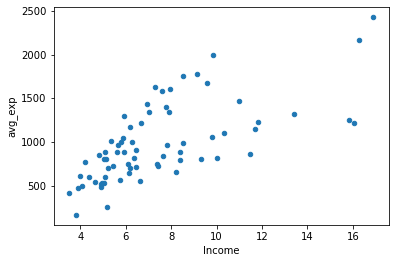

In [11]:
creditcard.plot(x='Income', y='avg_exp', kind='scatter')
#当发现散点图有发散的趋势时，首先需要对Y取对数，而且还应该尝试对X也取对数
#%%

In [ ]:
creditcard.plot(x='Income', y='avg_exp_ln', kind='scatter')

,avg_exp_ln,Income
avg_exp_ln,1.00000,0.63489
Income,0.63489,1.00000


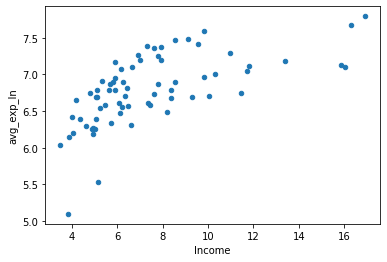

In [12]:
# 相关性分析:“spearman”,“pearson” 和 "kendall"
# In[ ]:
#import numpy as np
#creditcard['Income_ln']=np.log(creditcard['Income'])
# In[ ]:相关系数
creditcard[['avg_exp_ln', 'Income']].corr(method='pearson')

In [ ]:
当发现散点图，左侧集中，右侧发散==》则其直方图肯定是右偏的函数

In [ ]:
对右偏的函数取对数，让其不再发散

In [ ]:
相关系数|r|越大，两个变量之间相关性乐越强
    - <0.3,两个变量之间几乎不存在相关性
    
相关系数的P值检验没有意义，只需要看|r|

In [ ]:
检验的作用：
    

In [ ]:
变量少的时候，直接线性回归
变量多的时候，每个X和Y作检验，只保留显著的有意义的变量
放入模型备选

In [ ]:
第一步：假设检验筛选

In [ ]:
相关系数的计算：
    pearson相关系数功能公式

# 答疑

In [ ]:
P值：T越大，P值越小
t = (x拔-均值μ)/样本的标准误,
样本的标准误=样本的标准差/根号n

所以n越大 t越大 p越小

In [ ]:
一般统计学中不处理大样本